In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

np.random.seed(0)
random.seed(0)



In [4]:
def least_square(x,y):
	# TODO
	# return the least-squares solution
	# you can use np.linalg.lstsq
	x = x.reshape(-1,1)
	x2 = np.ones_like(x)
	X = np.concatenate([x,x2], axis=1)
	k,b = np.linalg.lstsq(X, y, rcond=None)[0]
	return k, b

In [2]:


def num_inlier(x,y,k,b,n_samples,thres_dist):
	# TODO
	# compute the number of inliers and a mask that denotes the indices of inliers
	num = 0
	mask = np.zeros(x.shape, dtype=bool)

	return num, mask

def ransac(x,y,iter,n_samples,thres_dist,num_subset):
	# TODO
	# ransac
	k_ransac = None
	b_ransac = None
	inlier_mask = None
	best_inliers = 0

	return k_ransac, b_ransac, inlier_mask




In [5]:
# def main():
iter = 300
thres_dist = 1
n_samples = 500
n_outliers = 50
k_gt = 1
b_gt = 10
num_subset = 5
x_gt = np.linspace(-10,10,n_samples)
print(x_gt.shape)
y_gt = k_gt*x_gt+b_gt
# add noise
x_noisy = x_gt+np.random.random(x_gt.shape)-0.5
y_noisy = y_gt+np.random.random(y_gt.shape)-0.5
# add outlier
x_noisy[:n_outliers] = 8 + 10 * (np.random.random(n_outliers)-0.5)
y_noisy[:n_outliers] = 1 + 2 * (np.random.random(n_outliers)-0.5)

(500,)


In [6]:
# least square
k_ls, b_ls = least_square(x_noisy, y_noisy)

In [7]:
k_ls

0.6159656578755459

In [ ]:
# ransac
k_ransac, b_ransac, inlier_mask = ransac(x_noisy, y_noisy, iter, n_samples, thres_dist, num_subset)
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
ransac(x_noisy, y_noisy, iter, n_samples, thres_dist, num_subset)

In [14]:
print(x_noisy.shape)
print(y_noisy.shape)

print(thres_dist)
print(num_subset)

(500,)
(500,)
1
5


In [26]:
def num_inlier(x,y,k,b,n_samples,thres_dist):
	# TODO
	# compute the number of inliers and a mask that denotes the indices of inliers
	num = 0
	mask = np.zeros(x.shape, dtype=bool)

	dist = np.abs(x*k - y + b) / np.sqrt(k*k + 1)
	mask = dist < thres_dist
	num = np.sum(mask)

	return num, mask

In [27]:
x,y,iter,n_samples,thres_dist,num_subset = x_noisy, y_noisy, iter, n_samples, thres_dist, num_subset

def ransac(x,y,iter,n_samples,thres_dist,num_subset):
	# TODO
	# ransac
	k_ransac = None
	b_ransac = None
	mask_ransac = None

	inlier_mask = None
	best_inliers = 0


	for i in range(iter):
		index_list = list(range(x_noisy.shape[0]))
		index_mask = random.sample(index_list, num_subset)

		xx = x[index_mask]
		yy = y[index_mask]

		kk, bb = least_square(xx, yy)
		
		# inliners are counted on the whole dataset
		inliner_count, inlier_mask = num_inlier(x, y, kk, bb, n_samples=n_samples, thres_dist=thres_dist)

		# if more inliners obtained => better estimator
		if inliner_count > best_inliers:
			mask_ransac = inlier_mask
			best_inliers = inliner_count
			k_ransac = kk
			b_ransac = bb
			
	return k_ransac, b_ransac, mask_ransac

Estimated coefficients (true, linear regression, RANSAC):
1 10 0.6159656578755459 8.96172714144364 1.0529369738905774 9.907592043634942


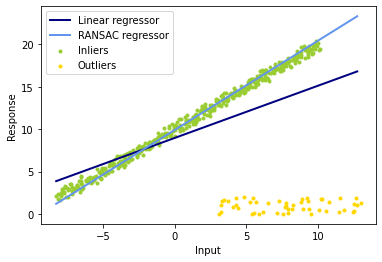

In [28]:
# ransac
k_ransac, b_ransac, inlier_mask = ransac(x_noisy, y_noisy, iter, n_samples, thres_dist, num_subset)
outlier_mask = np.logical_not(inlier_mask)

print("Estimated coefficients (true, linear regression, RANSAC):")
print(k_gt, b_gt, k_ls, b_ls, k_ransac, b_ransac)

line_x = np.arange(x_noisy.min(), x_noisy.max())
line_y_ls = k_ls*line_x+b_ls
line_y_ransac = k_ransac*line_x+b_ransac

plt.scatter(
    x_noisy[inlier_mask], y_noisy[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    x_noisy[outlier_mask], y_noisy[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_x, line_y_ls, color="navy", linewidth=2, label="Linear regressor")
plt.plot(
    line_x,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=2,
    label="RANSAC regressor",
)
plt.legend()
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

[464, 111, 258, 71, 144]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
x,y = x_noisy, y_noisy
A = np.vstack([x, np.ones(len(x))]).T
np.linalg.lstsq(A, y, rcond=None)[0]

array([0.61596566, 8.96172714])

In [17]:
x = x.reshape(-1,1)
x2 = np.ones_like(x)
np.concatenate([x,x2], axis=1).shape

(500, 2)

In [24]:
k,b = least_square(x,y)

In [26]:
print(x.min(), x.max())

-8.273706692257985 12.95815292959635


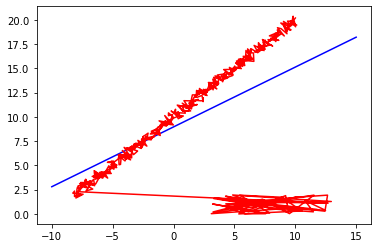

In [29]:
xx = np.linspace(-10, +15, 100)
plt.plot(xx, k*xx+b, 'blue')
plt.plot(x, y, 'red')

In [21]:
x,y = x_noisy, y_noisy
(np.vstack([x, np.ones(len(x))]).T).shape

(500, 2)

In [9]:
print(x_noisy.shape)
print(y_noisy.shape)

(500,)
(500,)


In [ ]:


# least square
k_ls, b_ls = least_square(x_noisy, y_noisy)

# ransac
k_ransac, b_ransac, inlier_mask = ransac(x_noisy, y_noisy, iter, n_samples, thres_dist, num_subset)
outlier_mask = np.logical_not(inlier_mask)

print("Estimated coefficients (true, linear regression, RANSAC):")
print(k_gt, b_gt, k_ls, b_ls, k_ransac, b_ransac)

line_x = np.arange(x_noisy.min(), x_noisy.max())
line_y_ls = k_ls*line_x+b_ls
line_y_ransac = k_ransac*line_x+b_ransac

plt.scatter(
	x_noisy[inlier_mask], y_noisy[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
	x_noisy[outlier_mask], y_noisy[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_x, line_y_ls, color="navy", linewidth=2, label="Linear regressor")
plt.plot(
	line_x,
	line_y_ransac,
	color="cornflowerblue",
	linewidth=2,
	label="RANSAC regressor",
)
plt.legend()
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()